# AnaCont

Small tutorial on how to use AnaCont to compute the analytic continuation of a Green's function.

In [1]:
import numpy as np
from dga import analytic_continuation as cont
from test_util import  test_data as td

# Load the (dmft) data:
ddict, hr = td.load_minimal_dataset()
ddict.keys()

dict_keys(['giw', 'siw', 'n', 'beta', 'u', 'mu_dmft', 'g4iw_dens', 'g4iw_magn'])

In [2]:
# Set up max-ent object. **kwargs are parameters passed to the max-ent solver.
max_ent = cont.MaxEnt(ddict['beta'],kernel_mode='freq_fermionic', nwr = 1001, bw = 0.1)

In [3]:
# Compute the analytic continuation of the Green's function:
gw_cont = max_ent.cont_single_ind(ddict['giw'])

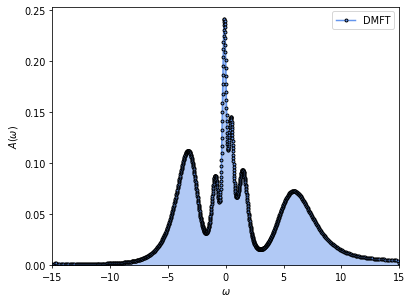

In [4]:
# Plot the result:
import matplotlib.pyplot as plt

plt.figure(dpi=70)
plt.plot(max_ent.w,-1/np.pi * gw_cont.imag,color='cornflowerblue',label='DMFT')
plt.fill_between(max_ent.w,-1/np.pi * gw_cont.imag,color='cornflowerblue',alpha=0.5)
plt.legend()
plt.ylim(0,None)
plt.xlim(max_ent.w[0],max_ent.w[-1])
plt.xlabel('$\omega$')
plt.ylabel('$A(\omega)$')
plt.show()

In [5]:
# Use the same max-ent object to compute the analytic continuation of the self-energy:
from dga import two_point as twop
hartree = twop.get_smom0(ddict['u'],ddict['n'])
sigma_cont = max_ent.cont_single_ind(ddict['siw']-hartree)+hartree # remove Hartree contribution for self-energy

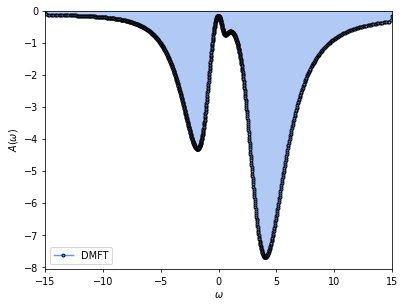

In [6]:
plt.figure(dpi=70)
plt.plot(max_ent.w,sigma_cont.imag,color='cornflowerblue',label='DMFT')
plt.fill_between(max_ent.w,sigma_cont.imag,color='cornflowerblue',alpha=0.5)
plt.legend()
plt.ylim(None,0)
plt.xlim(max_ent.w[0],max_ent.w[-1])
plt.xlabel('$\omega$')
plt.ylabel('$A(\omega)$')
plt.show()

In [7]:
# Sanity check the results:
from dga import brillouin_zone as bz
nk = (100,100,1)
sym = bz.two_dimensional_square_symmetries()
k_grid = bz.KGrid(nk,sym)
ek = hr.get_ek(k_grid)

gw = twop.RealFrequencyGF(max_ent.w,sigma_cont,ek,n=ddict['n'])
print('---------------')
print('mu-DMFT = ',ddict['mu_dmft'])
print('mu-cont = ',gw.mu[0])
print('---------------')

---------------
mu-DMFT =  2.4071092947399215
mu-cont =  2.381988591155336
---------------


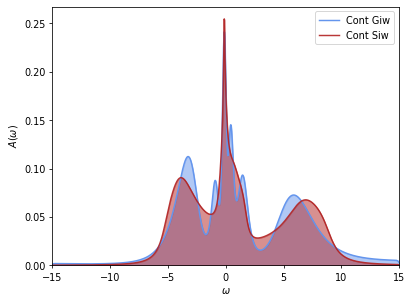

In [8]:
plt.figure(dpi=70)
plt.plot(max_ent.w,-1/np.pi * gw_cont.imag,'-',color='cornflowerblue',label='Cont Giw')
plt.fill_between(max_ent.w,-1/np.pi * gw_cont.imag,color='cornflowerblue',alpha=0.5)
plt.plot(max_ent.w,gw.aw,'-',color='firebrick',label='Cont Siw')
plt.fill_between(max_ent.w,gw.aw,color='firebrick',alpha=0.5)
plt.legend()
plt.ylim(0,None)
plt.xlim(max_ent.w[0],max_ent.w[-1])
plt.xlabel('$\omega$')
plt.ylabel('$A(\omega)$')
plt.show()